In [85]:
import psycopg2 as pg
import pandas.io.sql as psql
from datetime import datetime
import json

conn_str = "host={0} port={1} dbname={2} user={3} password={4}" \
.format("localhost", 5432, "kanjidb", "postgres", "w0lfpack")

try:
    conn = pg.connect(conn_str)
    print("Welcome to Jupyter Notebook.  You are connected to the Kanji database!")
except pg.OperationalError:
    print("You are not connected to the database.")

Welcome to Jupyter Notebook.  You are connected to the Kanji database!


In [90]:
_STATUS_ONLINE = 10001
_DEPLOY_STATE_MAINTENANCE = 10002
_REPORT_INTERVAL_MINS = 560

In [91]:
#now = datetime.datetime.now()
#timestart = now - datetime.timedelta(hours=1, minutes=15)
#querytime = timestart.strftime("%Y/%m/%d %H:%M:%S")
#print("report period {0} - {1}".format(timestart, now))

query = "SELECT timestamp, eventdata FROM kanji_eventlog eventlog WHERE eventlog.timestamp>= NOW() - INTERVAL '{0} minutes' \
AND (eventlog.node_id=10020)".format(_REPORT_INTERVAL_MINS) 

print(query)

#print("Today is {0}".format(now))
cur = conn.cursor()
cur.execute(query)
rows = cur.fetchall()
if len(rows) > 0:
    timedata = []
    tempdata = []
    tlstdata = []
    ctladata = []
    ctlbdata = []    
    print("The query returned {0} rows.".format(len(rows))) 
    for row in rows:
        #print(row)
        #timestamp = row[0].strftime("%m/%d/%Y %H:%M:%S")
        timestamp = row[0]
        pins = json.loads(row[1])        
        for pin in pins:
            pintype = pin['t']
            pinvalue = pin['v']
            if pintype==29:
              tempdata.append(float(pinvalue))
              timedata.append(timestamp)
            elif pintype==34:
              tlstdata.append(float(pinvalue))
            elif pintype==32:
              ctladata.append(int(pinvalue) + .5)
            elif pintype==33:
              ctlbdata.append(int(pinvalue) + 2)
    print("tempdata {0}".format(len(tempdata)))
    print("tlstdata {0}".format(len(tlstdata)))
    print("ctladata {0}".format(len(ctladata)))
    print("ctlbdata {0}".format(len(ctlbdata)))
    print("timedata {0}".format(len(timedata)))
    
else:
    print("The query returned empty.")
    

SELECT timestamp, eventdata FROM kanji_eventlog eventlog WHERE eventlog.timestamp>= NOW() - INTERVAL '560 minutes' AND (eventlog.node_id=10020)
The query returned 1097 rows.
tempdata 1097
tlstdata 1097
ctladata 1097
ctlbdata 1097
timedata 1097


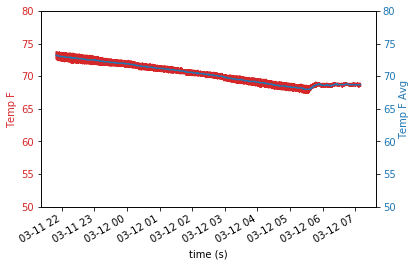

<Figure size 576x144 with 0 Axes>

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

# Create some mock data
t = np.array(timedata)
#data2 = np.exp(t)
data1 = np.array(tempdata)
data2 = np.array(tlstdata)
data3 = np.array(ctladata)
data4 = np.array(ctlbdata)
fig, ax1 = plt.subplots()

plt.figure(figsize=(8,2))

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Temp F', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temp F Avg', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.autofmt_xdate()

#myFmt = mdates.DateFormatter('%H:%M')
#ax1.xaxis.set_major_formatter(myFmt)
ax1.set_ylim(50, 80)
ax2.set_ylim(50, 80)
fig.autofmt_xdate()

#fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


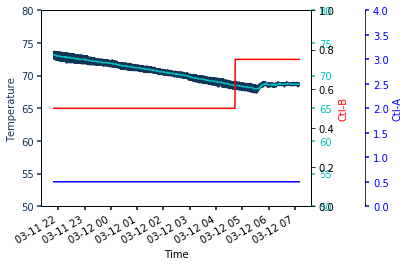

In [93]:
import matplotlib.pyplot as plt


def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)


fig, host = plt.subplots()
fig.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()
par3 = host.twinx()

# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
par2.spines["right"].set_position(("axes", 1.2))
# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
make_patch_spines_invisible(par2)
# Second, show the right spine.
par2.spines["right"].set_visible(True)

p1, = host.plot(t, data1, '#123456', label="Temperature")
p2, = par1.plot(t, data2, "c-", label="Avg Temp")
p3, = par2.plot(t, data3, "b-", label="Ctl-A")
p4, = par2.plot(t, data4, "r-", label="Ctl-B")



#host.set_xlim(0, 2)
host.set_ylim(50, 80)
par1.set_ylim(50, 80)
par2.set_ylim(0, 4)

host.set_xlabel("Time")
host.set_ylabel("Temperature")
#ar1.set_ylabel("Avg Temp")
par2.set_ylabel("Ctl-A")
par3.set_ylabel("Ctl-B")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())
par3.yaxis.label.set_color(p4.get_color())

tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

lines = [p1, p2, p3, p4]
fig.autofmt_xdate()

#host.legend(lines, [l.get_label() for l in lines])

plt.show()